# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())
#display(data.head(300))

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [4]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [183,198,275]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  36847  43950    20170   36534               239         47943
1  11686   2154     6824    3527               592           697
2    680   1610      223     862                96           379

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

The first establishment is a heavy consumer. Purchasing a large amount of goods, they are in the top 25% in every catagory except for Detergents_paper. This establishment probably is a form of retailer or other similar styled middle-man that sells a these products to smaller consumers. It is unlikely that are a resturant because of their low consumption of Detergents_Paper.  

The second establishment is more like your "Average consumer". This establishment is within one std of the mean in all catagories. This establishment is likely to be a settled resturant or other service provider with an average to strong consumer base. 

The third establishment is a (relatively) small consumer. They find themselves deep into the bottom 25 percentile. This establishment is possibly a small tender or street vender. Being that their purchases are more complex than one single item it is not likely they are a "HotDog Stand", but they seem to have concertrated their purchases disproportionately (in comparsion to the dataset statistics) in Delicatessen and Frozen purchases.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
def find_R_squared(foi):
    #foi = 'Detergents_Paper' #feature of interest
    new_data = data.drop(foi, axis=1)
    y_foi = data[foi]
    #display(data.head())
    #display(new_data.head())
    #display(paper.head())

    # TODO: Split the data into training and testing sets using the given feature as the target
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(new_data, y_foi, test_size=0.25,random_state=1)

    # TODO: Create a decision tree regressor and fit it to the training set
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state=1)
    regressor.fit(X_train,y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print("The feature {} has a R^2 value of {}".format(foi,score))

foi_list = ['Fresh','Milk','Grocery','Frozen', 'Detergents_Paper','Delicatessen']
for feature in foi_list:
    find_R_squared(feature)

The feature Fresh has a R^2 value of -0.923373659298
The feature Milk has a R^2 value of 0.515849943807
The feature Grocery has a R^2 value of 0.795768311576
The feature Frozen has a R^2 value of -0.649574327334
The feature Detergents_Paper has a R^2 value of 0.815241279195
The feature Delicatessen has a R^2 value of -0.429125195659


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
I predicted all of the features. Prediction scores are as follows:<br>
The feature Fresh has a R^2 value of -0.923373659298<br>
The feature Milk has a R^2 value of 0.515849943807<br>
The feature Grocery has a R^2 value of 0.795768311576<br>
The feature Frozen has a R^2 value of -0.649574327334<br>
The feature Detergents_Paper has a R^2 value of 0.815241279195<br>
The feature Delicatessen has a R^2 value of -0.429125195659<br><br>

At first I predicted the value for Detergents_Paper as my intutation told me that this would most likely be the best indicator of what type of consumer the establishment was. However, as you can see the results were completely the oppsite. Detergents_Paper has a high R^2 indicating that it could be predicted using other variables in the feature set. Fresh on the other hand has a R^2 value of -0.923 almost -1 indicating that there is almost no correlation between this feature and the five others in the dataset. As a result Fresh is a very relvelent feature. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

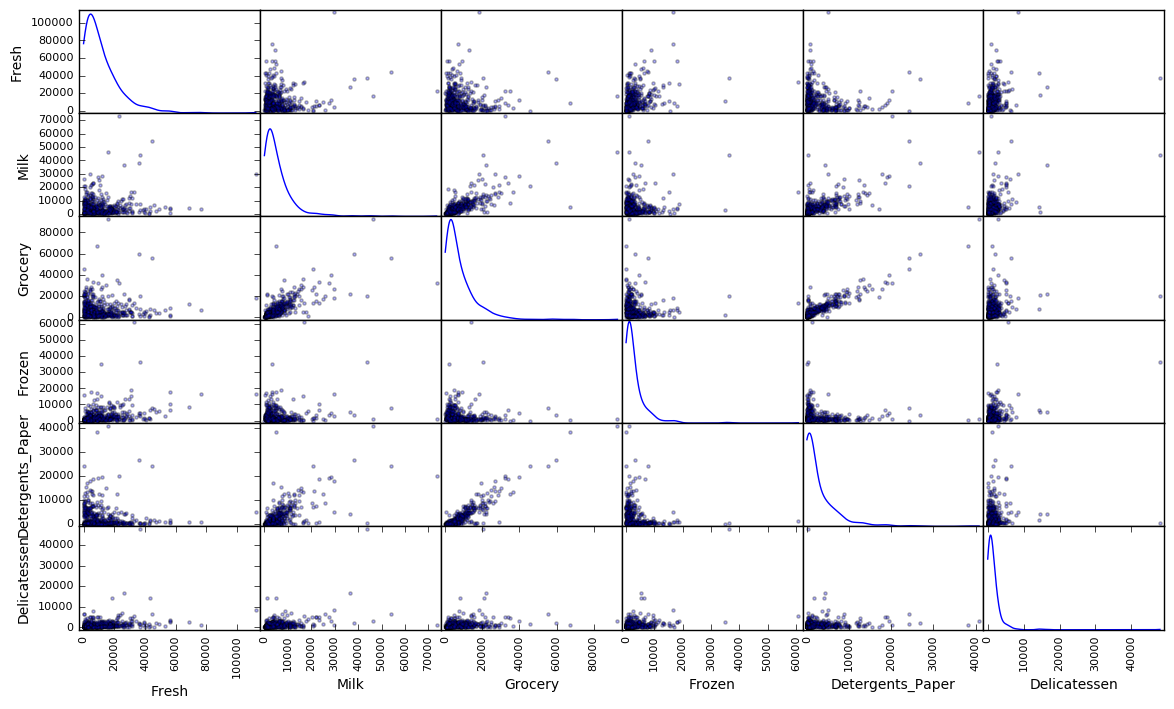

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

The following feature combinations appear to have corelations:<br>
Detergents_Paper - Grocery<br>
Detergents_Paper - Milk<br>
Milk - Grocery<br><br>

I would conjecture that this confirms the irrelevance of Detergents_Paper while the lack of correclations seen in Fresh verifies it's relevance as I predicted.<br><br>

The data in these feature combinations is right (or positively) skewed, with the mode and majority of the data points being to the left (of lower value) than the right side extremes.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

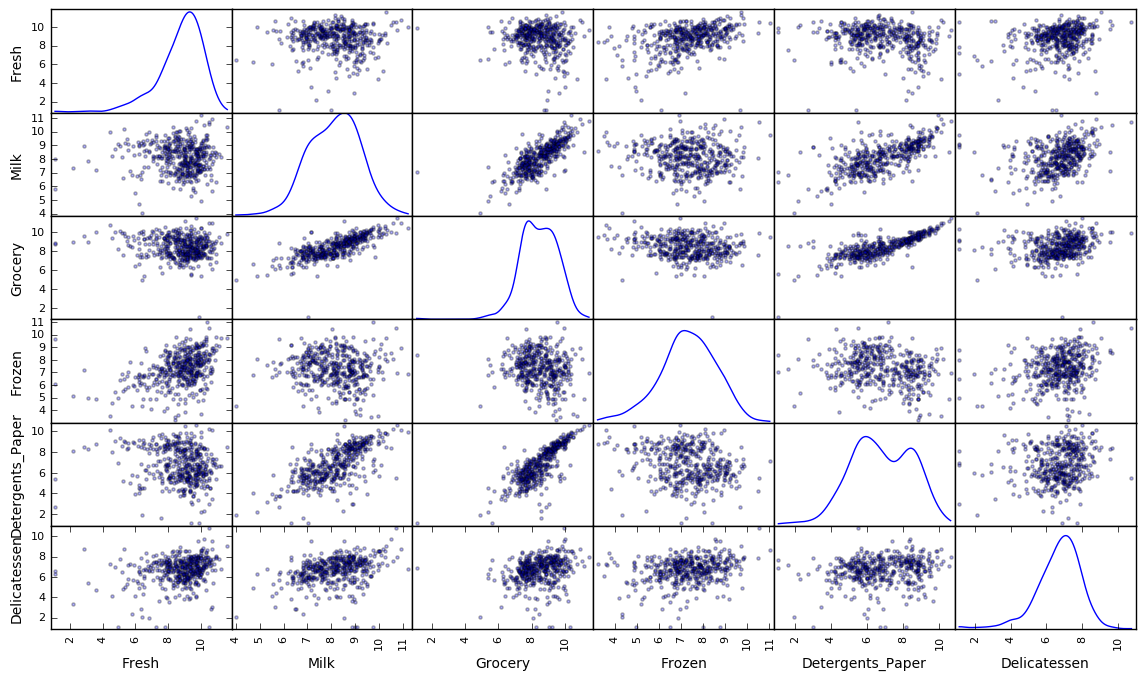

In [7]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

Fresh       Milk   Grocery     Frozen  Detergents_Paper  Delicatessen
0  10.514529  10.690808  9.911952  10.505999          5.476464     10.777768
1   9.366147   7.675082  8.828201   8.168203          6.383507      6.546785
2   6.522093   7.383989  5.407172   6.759255          4.564348      5.937536

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [21]:
# For each feature find the data points with extreme high or low values
outliers = []
repeats = []
feature_list =[]
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    for index in log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index:
        if index not in outliers:
            outliers.append(index)
            feature_list.append(feature)
        else:
            i = outliers.index(index)
            repeats.append([index,feature_list[i],feature])
    
# OPTIONAL: Select the indices for data points you wish to remove
#outliers  = []
print("Outliers: {}\n".format(outliers))
#print("Repeats: {} ".format(repeats))
display(repeats)
# Remove the outliers, if any were specified
#print(log_data.shape[0])
#print(len(outliers))
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
#print(good_data.shape[0])
display(log_samples)

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  9.655090          2.708050      6.309918
353  4.762174   8.742574   9.961898  5.429346          9.069007      7.013016
355  5.247024   6.588926   7.606885  5.501258          5.214936      4.844187
357  3.610918   7.150701  10.011086  4.919981          8.816853      4.700480
412  4.574711   8.190077   9.425452  4.584967          7.996317      4.127134

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.039983  11.205013  10.377047  6.894670          9.906981      6.805723
98    6.220590   4.718499   6.656727  6.796824          4.025352      4.882802
154   6.432940   4.007333   4.919981  4.317488          1.945910      2.079442
356  10.029503   4.897840   5.384495  8.057377          2.197225      6.306275

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
154  6.432940  4.007333  4.919981  4.317488          1.945910      2.079442

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.431853  9.663261   9.723703   3.496508          8.847360      6.070738
57    8.597297  9.203618   9.257892   3.637586          8.932213      7.156177
65    4.442651  9.950323  10.732651   3.583519         10.095388      7.260523
145  10.000569  9.034080  10.457143   3.737670          9.440738      8.396155
175   7.759187  8.967632   9.382106   3.951244          8.341887      7.436617
264   6.978214  9.177714   9.645041   4.110874          8.696176      7.142827
325  10.395650  9.728181   9.519735  11.016479          7.148346      8.632128
420   8.402007  8.569026   9.490015   3.218876          8.827321      7.239215
429   9.060331  7.467371   8.183118   3.850148          4.430817      7.824446
439   7.932721  7.437206   7.828038   4.174387          6.167516      3.951244

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923192  7.036148  1.098612  8.390949          1.098612      6.882437
161  9.428190  6.291569  5.645447  6.995766          1.098612      7.711101

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.197225   7.335634   8.911530   5.164786          8.151333   
109   7.248504   9.724899  10.274568   6.511745          6.728629   
128   4.941642   9.087834   8.248791   4.955827          6.967909   
137   8.034955   8.997147   9.021840   6.493754          6.580639   
142  10.519646   8.875147   9.018332   8.004700          2.995732   
154   6.432940   4.007333   4.919981   4.317488          1.945910   
183  10.514529  10.690808   9.911952  10.505999          5.476464   
184   5.789960   6.822197   8.457443   4.304065          5.811141   
187   7.798933   8.987447   9.192075   8.743372          8.148735   
203   6.368187   6.529419   7.703459   6.150603          6.860664   
233   6.871091   8.513988   8.106515   6.842683          6.013715   
285  10.602965   6.461468   8.188689   6.948897          6.077642   
289  10.663966   5.655992   6.154858   7.235619          3.465736   
343   7.431892   8.848509  10.177932   7.283448          9.646593   

     Delicatessen  
66       3.295837  
109      1.098612  
128      1.098612  
137      3.583519  
142      1.098612  
154      2.079442  
183     10.777768  
184      2.397895  
187      1.098612  
203      2.890372  
233      1.945910  
285      2.890372  
289      3.091042  
343      3.610918

Outliers: [65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 38, 57, 145, 175, 264, 325, 420, 429, 439, 161, 109, 137, 142, 183, 184, 187, 203, 233, 285, 289, 343]



[[154, 'Milk', 'Grocery'],
 [65, 'Fresh', 'Frozen'],
 [75, 'Grocery', 'Detergents_Paper'],
 [66, 'Fresh', 'Delicatessen'],
 [128, 'Fresh', 'Delicatessen'],
 [154, 'Milk', 'Delicatessen']]

Fresh       Milk   Grocery     Frozen  Detergents_Paper  Delicatessen
0  10.514529  10.690808  9.911952  10.505999          5.476464     10.777768
1   9.366147   7.675082  8.828201   8.168203          6.383507      6.546785
2   6.522093   7.383989  5.407172   6.759255          4.564348      5.937536

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Yes, there were five data points that were considered outliers for more than one feature based on the definition above:<br>
[[154, 'Milk', 'Grocery', 'Delicatessen'],<br>
 [65, 'Fresh', 'Frozen'],<br>
 [75, 'Grocery', 'Detergents_Paper'],<br>
 [66, 'Fresh', 'Delicatessen'],<br>
 [128, 'Fresh', 'Delicatessen']]<br>

Yes, they should be removed because they do not follow the "norm" of the data trends and therefore are likely to skew any findings or generalizations. <br>
All data points that were greater than 1.5 x IOR + 75% percentile or less than 1.5 x IQR - 25% percentile were considered abnormal and were added to the outlier list

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Explained Variance   Fresh    Milk  Grocery  Frozen  \
Dimension 1              0.4993 -0.0976  0.4109   0.4511 -0.1280   
Dimension 2              0.7252  0.5032  0.5479   0.5363  0.5020   
Dimension 3              0.8301  1.2484  0.3935   0.5567  0.2350   
Dimension 4              0.9279  0.9817  0.2560   0.4857  0.9483   
Dimension 5              0.9767  0.9931  0.9643   0.8025  1.0154   
Dimension 6              1.0000  1.0474  1.4820  -0.0242  0.9683   

             Detergents_Paper  Delicatessen  
Dimension 1            0.7595        0.1579  
Dimension 2            0.7219        0.6213  
Dimension 3            0.9568        0.0791  
Dimension 4            1.2725       -0.4654  
Dimension 5            0.7996       -0.8774  
Dimension 6            1.0076       -0.8680

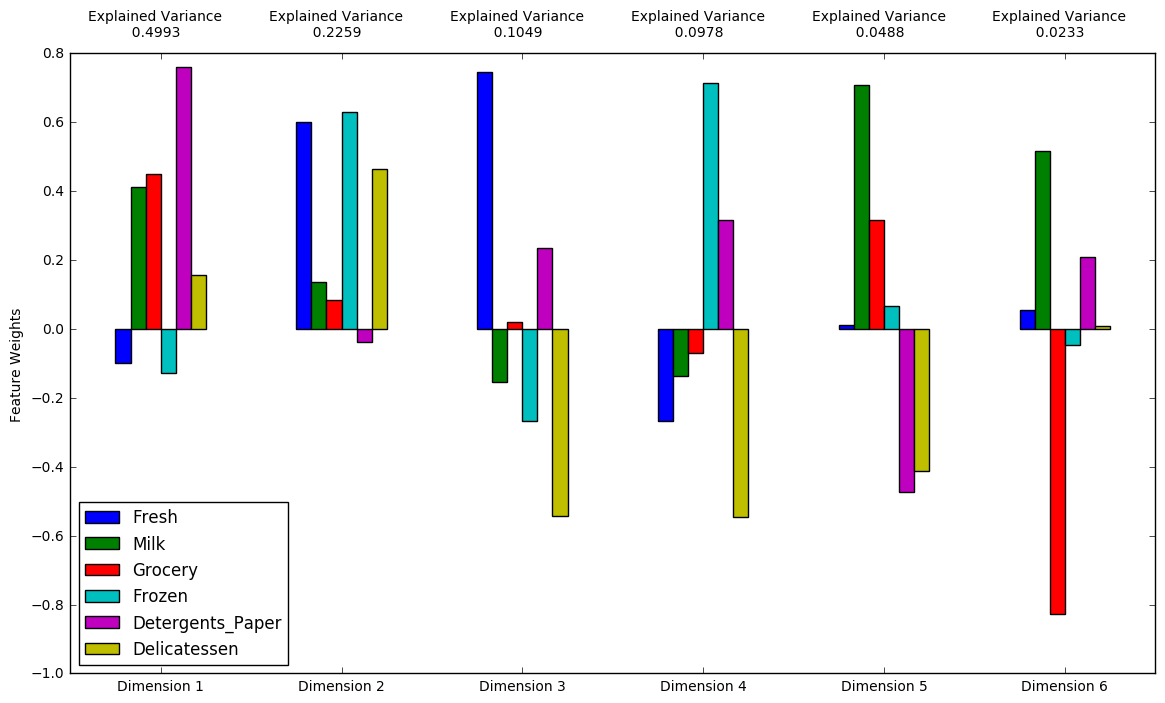

In [22]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA 
pca = PCA()
pca.fit(good_data)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
pca_results.cumsum()

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**
In total .7252 or 72.52% of the variance in the data is explained by the first and second principal components. 0.9279 or 92.79% of the variance in the data is explained by the first four principal components.

The first dimension is comprised mostly of the features we talked about in the R^2 section of this project. Heavy weights are placed on Detergents_Paper, Grocery, and Milk. This it your "Basic needs" group. When an establishment, possibly a retailer, buys any one of their basic needs they are likely to buy all three. 

The second dimension is the exact oppsite of the first placing heavy weights on Fresh, Frozen, and Delicatessen and small (or even negative weights in the case of Detergents_Paper) on the predominate features of the first dimension. Establishments that find themselves purchasing in this dimension are not likely to be the type that need an over-abundence of paper products to carry-out their service (possibly because they are smaller resturants) .

The third dimension is anyone's guess. It appears to be a strong positive corrlation with fresh and a negative correlation with Delicatessen. This appears to be one of those insights that is not obvious to the human eye but a machine learning algorthim is able to tease-out of the data. Perhaps there is a small subset of street venders that is not interested in anything but their limited fresh food product (maybe they sell chocolate dipped strawberries) and a few paper products to go with it.

The fourth dimension is the products that can be stored for a long duration of time. Both paper frozen products are designed to be kept without fear of spoilage or experations. This group could represent establishments that need to stock up on supplies because they will not be in contact with wholesale retailers for a period of time. For example a shipping freightor might be setting sail to cross the ocean and need supplies for the 2-3 week journey. They would likely not be buying fresh products but items that will withstand the passage. 


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [23]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0       0.8131       5.2596      -2.4735      -1.2656       1.4993   
1      -0.4824       0.5965       0.2455       0.4550       0.1642   
2      -3.1652      -2.5448      -1.6195       0.2488      -0.1416   

   Dimension 6  
0      -0.1986  
1      -0.6673  
2       1.5379

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [24]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [25]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0       0.8131       5.2596
1      -0.4824       0.5965
2      -3.1652      -2.5448

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

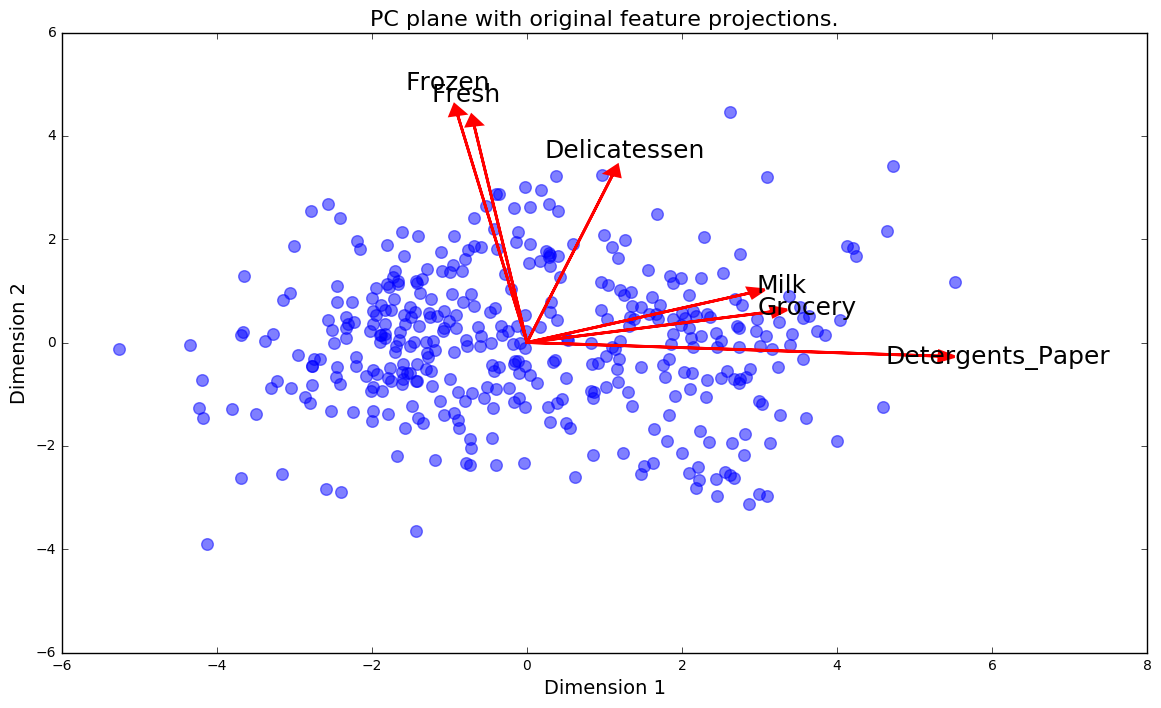

In [26]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**<br>
Both K-Means and Gaussian Mixture Model break-up a group of data into a predefined number of clusters. The greatest difference between the two is K-Means is absolutly certian about it's groups while Gaussian Mixture Model retains it's ability to express uncertianty. The advantage of K-Means is that it is, faster and simplier when breaking down data into clusters and subclusters. However, GMM uses soft-clustering and provides mixture membership. This could possibly be very helpful in helping us determine  how many clusters are ideal to break up the data while still retaining a minimum amount of certainity.

To better visualize the concept I'm trying to express here look at the score values listed below. GMM scores peak at 2 clusters and then continue to drop off while KMeans hover a little over 0.3 throughout the majority of the cluster trials making it more difficult to determine how many clusters is ideal. 

Because I am not 100% confident on how many segments of clusters to break this data into I will use GMM.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [28]:
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score 

for n in range(2,16):
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components=n)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    print("The score for {} n_components in GMM is {}".format(n,score))

print("")
for n in range(2,16): ##KMean applied for curiosity purposes
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data,preds)
    print("The score for {} n_cluster in KMeans is {}".format(n,score))


The score for 2 n_components in GMM is 0.443601474015
The score for 3 n_components in GMM is 0.357294514249
The score for 4 n_components in GMM is 0.291646368377
The score for 5 n_components in GMM is 0.268398207036
The score for 6 n_components in GMM is 0.307122866447
The score for 7 n_components in GMM is 0.295732754452
The score for 8 n_components in GMM is 0.308161817168
The score for 9 n_components in GMM is 0.292954198302
The score for 10 n_components in GMM is 0.259764997853
The score for 11 n_components in GMM is 0.220801313145
The score for 12 n_components in GMM is 0.221561449089
The score for 13 n_components in GMM is 0.201305543457
The score for 14 n_components in GMM is 0.166676169804
The score for 15 n_components in GMM is 0.133374377206

The score for 2 n_cluster in KMeans is 0.447157742293
The score for 3 n_cluster in KMeans is 0.36398647984
The score for 4 n_cluster in KMeans is 0.330901909859
The score for 5 n_cluster in KMeans is 0.353193403287
The score for 6 n_clus

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**<br>
The score for 2 n_components in GMM is 0.443601474015<br>
The score for 3 n_components in GMM is 0.357294514249<br>
The score for 4 n_components in GMM is 0.291646368377<br>
The score for 5 n_components in GMM is 0.267804526026<br>
The score for 6 n_components in GMM is 0.307122866447<br>
The score for 7 n_components in GMM is 0.295333399467<br>
The score for 8 n_components in GMM is 0.331283874435<br>
The score for 9 n_components in GMM is 0.268312665936<br>
The score for 10 n_components in GMM is 0.267249586896<br>
The score for 11 n_components in GMM is 0.212616482111<br>
The score for 12 n_components in GMM is 0.211869031591<br>
The score for 13 n_components in GMM is 0.17180982105<br>
The score for 14 n_components in GMM is 0.150851594757<br>
The score for 15 n_components in GMM is 0.129491032093<br>
<br>
The score for 2 n_cluster in KMeans is 0.447157742293<br>
The score for 3 n_cluster in KMeans is 0.36398647984<br>
The score for 4 n_cluster in KMeans is 0.331150954285<br>
The score for 5 n_cluster in KMeans is 0.353193403287<br>
The score for 6 n_cluster in KMeans is 0.363649931713<br>
The score for 7 n_cluster in KMeans is 0.356049646695<br>
The score for 8 n_cluster in KMeans is 0.368165221053<br>
The score for 9 n_cluster in KMeans is 0.367413488721<br>
The score for 10 n_cluster in KMeans is 0.352093934563<br>
The score for 11 n_cluster in KMeans is 0.351554178258<br>
The score for 12 n_cluster in KMeans is 0.354004014977<br>
The score for 13 n_cluster in KMeans is 0.364016395629<br>
The score for 14 n_cluster in KMeans is 0.355599181227<br>
The score for 15 n_cluster in KMeans is 0.356489703859<br>

In [29]:
#Final decision to use GMM with two clusters implimented here
n=2
clusterer = GMM(n_components=n)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)
print("The score for {} n_components in GMM is {}".format(n,score))

The score for 2 n_components in GMM is 0.443601474015


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

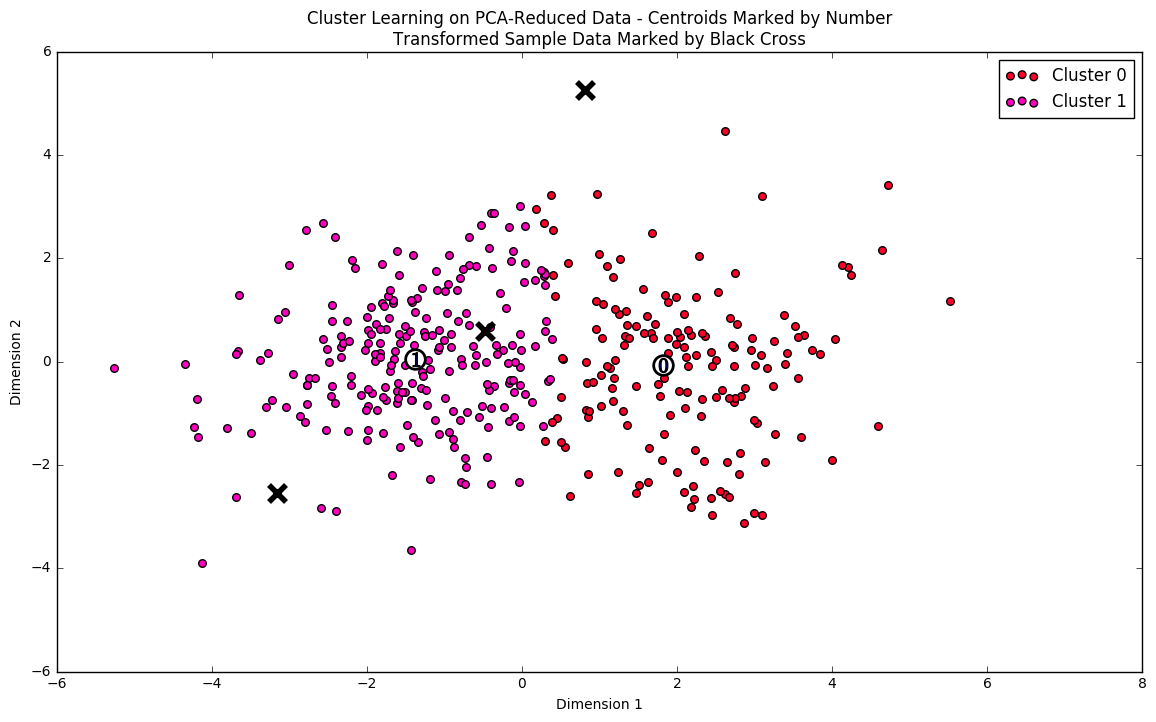

In [30]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [31]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0  6079.0  7042.0  10241.0  1275.0            3546.0        1159.0
Segment 1  8967.0  1920.0   2437.0  2081.0             309.0         741.0

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**<br>
I believe there are two types of establishments here. Segment 0, those that sell prepared food to hungry customers and Segment 1, thoses that sell food to thoses that sell prepared food to hungry customers. 

I am basing the majority of this conjecture on the Detergents_Paper feature. I'm assuming with every plate a resturant serves they will also have to serve a napkin or other paper product. A distrubitor however can sell and mountain of food and never touch one product in the Detergents_Paper categories. Therefore because of their Detergents_Paper consumption Segment 0 is more likely to be resturants and Segment 1 retailers or distrubitors. 

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [32]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**<br>
Yes, for the first establishment I theorized that it was a large coorporation that resold or distrubited the purchases. For establishments 2 and 3 I theorized that they were closer in relation. That they were both service companies that likely prepared and sold the food to hungry customers. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**<br>
This question is difficult to answer because of the large time-scale dificiency between data, given in annual spending, and they question, a delivery change in terms of days. It is safe to say that change does not affect all customers equally. for example you could have two establishments spending equal amounts annually but one is very concerned with freshness and therefore buys a small amount as often as possible. The other is more concerned with saving shipping costs and therefore buys much larger quanties at a much lower frequency. The delivery service change will now have a much larger impact on the establishment as their options for "freshness" have now expanded. For the second establishment the change will have no effect. 

Because the data we have now does not give us a link between the segment and the frequency of delivery we can do little more than speculate. Perhaps those that are consuming milk, groceries, and paper products are in the service industry and therefore would enjoy a more frequent, almost on-demand service. 

The good thing about segment group and A/B testing is we can carefully split our A and B groups across the segments to make sure we are getting the best view possible on which segments react well to the change and which don't.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**<br>
We now have two segments with all the points in each segment labled 0 or 1. These could be used to with a number of supervised learning techniques (KNN and Linear Regression are just a couple that come to mind) to create a prediction algorthim. New customers could then be placed in the algorthim to determine which segment they most likely fit in. 

These engineered features could also be used to predict other things such as advertising campaign effectiveness or perhaps bundling products together into sales or promotions. Once you know what segment an establishment falls into you might be able to combine this with location or region to find peak consuming seasons. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

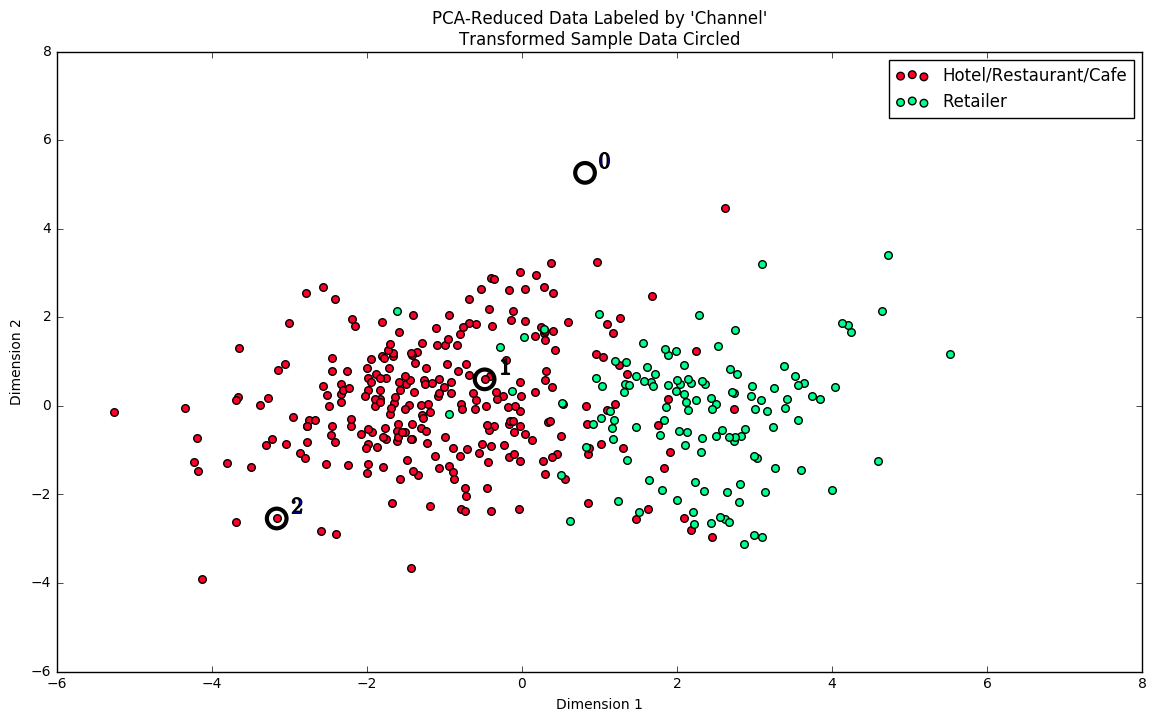

In [33]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**<br>
The clustering algorithm and the number of cluster chosen (2) fit very well with the distribution of Hotel/Restaurant/Cafe to Retailer customer. In fact they are almost identical the left cluster defined as cluster 0 coincids with the Hotel/Restaurant/Cafe group while the Retailer customers fit into the cluster 1 segment. I would consider these classification consistent with my previous definition of the customer segments. With the caveat that my interpertation of the segments was backwards. I suggested Segment 1 to be retail distrubitors and Segment 0 to be resturants whereas in reality it is the exact oppsite. It seems my assumption of using Detergents_Paper as an indicator was misplaced.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.